In [1]:
import numpy as Numpy
import pandas as Pandas

import matplotlib.pyplot as PyPlot

import seaborn as sns

In [4]:
df = Pandas.read_csv('./uci_malware_detection.csv')

print(df.head())

           Label  F_1  F_2  F_3  F_4  F_5  F_6  F_7  F_8  F_9  ...  F_522  \
0  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   
1  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   
2  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   
3  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   
4  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   

   F_523  F_524  F_525  F_526  F_527  F_528  F_529  F_530  F_531  
0      0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0  

[5 rows x 532 columns]


In [5]:
df.shape

(373, 532)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Columns: 532 entries, Label to F_531
dtypes: int64(531), object(1)
memory usage: 1.5+ MB


In [9]:
print(df.duplicated().value_counts())

False    371
True       2
Name: count, dtype: int64


In [15]:
df.drop_duplicates(inplace = True)

In [16]:
df.duplicated().value_counts()

False    371
Name: count, dtype: int64

In [20]:
# x for x in fruits if "a" in x
df['Label'] = [1.0 if x == "malicious" else 0.0 for x in df['Label']]

In [22]:
df['Label'].info()

<class 'pandas.core.series.Series'>
Index: 371 entries, 0 to 372
Series name: Label
Non-Null Count  Dtype  
--------------  -----  
371 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


<Axes: xlabel='Label', ylabel='count'>

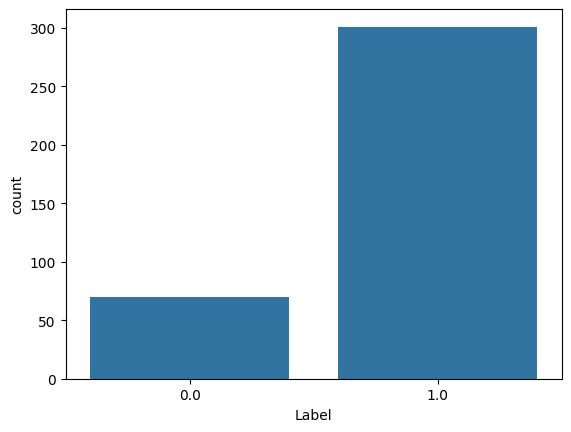

In [103]:
sns.countplot(x = 'Label', data = df)

In [31]:
print(x_data.head())

   F_1  F_2  F_3  F_4  F_5  F_6  F_7  F_8  F_9  F_10  ...  F_522  F_523  \
0    1    0    1    0    1    0    1    0    1     0  ...      0      0   
1    1    0    1    0    1    0    1    0    1     0  ...      0      0   
2    1    0    1    0    1    0    1    0    1     0  ...      0      0   
3    1    0    1    0    1    0    1    0    1     0  ...      0      0   
4    1    0    1    0    1    0    1    0    1     0  ...      0      0   

   F_524  F_525  F_526  F_527  F_528  F_529  F_530  F_531  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 531 columns]


In [34]:
print(type(x_data), type(y_data))
print(x_data.shape, y_data.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(371, 531) (371,)


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3)

In [111]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [112]:
y_pred = model.predict(x_test)

In [113]:
model.score(x_test, y_test)

0.9910714285714286

In [114]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        19
         1.0       1.00      0.99      0.99        93

    accuracy                           0.99       112
   macro avg       0.97      0.99      0.98       112
weighted avg       0.99      0.99      0.99       112



In [116]:
print(confusion_matrix(y_test, y_pred))

[[19  0]
 [ 1 92]]


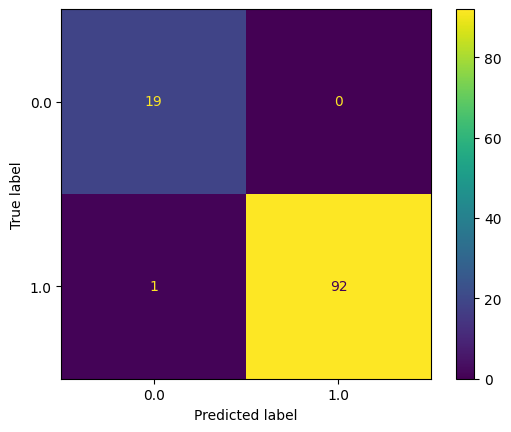

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay
confusionMatrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix,
                              display_labels= model.classes_)
disp.plot()

In [118]:
from sklearn.metrics import mean_squared_error, r2_score

#print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.01
Coefficient of determination: 0.94


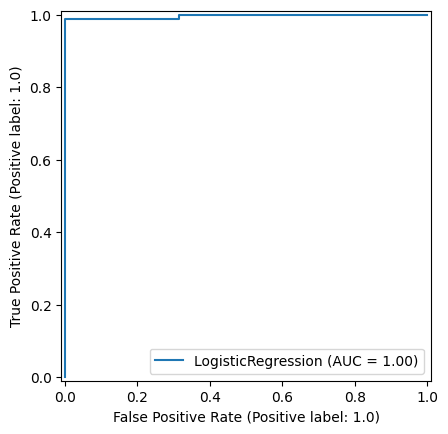

In [119]:
from sklearn.metrics import RocCurveDisplay

logreg_disp = RocCurveDisplay.from_estimator(model, x_test, y_test)